# Simple OLS Regression

### Figure Out the Beta and Alpha of AAPL Stock

In finance, people often compare the peformance of a stock to a benchmark.  A common benchmark is the S&P 500.  Let's take a well known stock Apple and compare it to the S&P 500 and compute the beta and alpha.

### What Is Beta?

Beta is the slope of the returns of the stock vs the benchmark

### What is Alpha?

Alpha is the excess returns of the stocks relative to the benchmark

### How Can We Compute this?

Run a regression of daily returns of the stock vs the daily returns of the S&P 500 (the SPY will be the proxy)

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import pandas_datareader.data as web

In [8]:
from datetime import datetime

start = datetime(2016, 9, 1)

end = datetime(2018, 9, 1)

aapl = web.DataReader('AAPL', 'yahoo', start, end)
spy = web.DataReader('SPY', 'yahoo', start, end)

In [10]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-09-01,26.700001,26.405001,26.535000,26.682501,106806000.0,25.103992
2016-09-02,27.000000,26.705000,26.924999,26.932501,107210000.0,25.339201
2016-09-06,27.075001,26.877501,26.975000,26.924999,107521600.0,25.332144
2016-09-07,27.190001,26.767500,26.957500,27.090000,169457200.0,25.487383
2016-09-08,26.817499,26.309999,26.812500,26.379999,212008000.0,24.819384
...,...,...,...,...,...,...
2018-08-27,54.685001,54.082500,54.287498,54.485001,82100400.0,52.954708
2018-08-28,55.134998,54.730000,54.752499,54.924999,91107200.0,53.382347
2018-08-29,55.872501,54.852501,55.037498,55.744999,109019200.0,54.179314


In [12]:
aapl['aapl_ret'] = aapl['Adj Close'].pct_change()

In [13]:
spy['spy_ret'] = spy['Adj Close'].pct_change()

In [18]:
df = pd.merge(aapl, spy, left_index=True, right_index=True)
df.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,aapl_ret,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y,spy_ret
Date,,,,,,,,,,,,,,
2016-09-01,26.700001,26.405001,26.535000,26.682501,106806000.0,25.103992,NaN,217.729996,216.029999,217.369995,217.389999,97844200.0,198.775284,NaN
2016-09-02,27.000000,26.705000,26.924999,26.932501,107210000.0,25.339201,0.009369,218.869995,217.699997,218.389999,218.369995,79293900.0,199.671371,0.004508
2016-09-06,27.075001,26.877501,26.975000,26.924999,107521600.0,25.332144,-0.000279,219.119995,217.860001,218.699997,219.029999,56702100.0,200.274857,0.003022
2016-09-07,27.190001,26.767500,26.957500,27.090000,169457200.0,25.487383,0.006128,219.220001,218.300003,218.839996,219.009995,76554900.0,200.256561,-0.000091
2016-09-08,26.817499,26.309999,26.812500,26.379999,212008000.0,24.819384,-0.026209,218.940002,218.149994,218.619995,218.509995,74102900.0,199.799377,-0.002283


In [19]:
df = df[['Adj Close_x','Adj Close_y','aapl_ret', 'spy_ret']]
df.head()

,Adj Close_x,Adj Close_y,aapl_ret,spy_ret
Date,,,,
2016-09-01,25.103992,198.775284,NaN,NaN
2016-09-02,25.339201,199.671371,0.009369,0.004508
2016-09-06,25.332144,200.274857,-0.000279,0.003022
2016-09-07,25.487383,200.256561,0.006128,-0.000091
2016-09-08,24.819384,199.799377,-0.026209,-0.002283


In [20]:
X = df['spy_ret'].values[1:]
Y = df['aapl_ret'].values[1:]

In [23]:
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     240.4
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.45e-44
Time:                        20:59:20   Log-Likelihood:                 1589.6
No. Observations:                 503   AIC:                            -3175.
Df Residuals:                     501   BIC:                            -3167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.018      0.044    2.44e-05       0.002
x1             1.0665      0.069     15.504      0.000       0.931       1.202
==============================================================================
Omnibus:                      155.934   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.395
Skew:                           1.159   Prob(JB):                    1.67e-237
Kurtosis:                       9.830   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Beta

$\beta = 1.07$ (0.93 to 1.20)  
$\alpha = 9$ bps (P value = 0.04)

$R^2 = 0.32$

In [26]:
import seaborn as sns

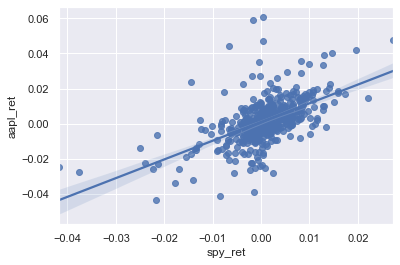

In [34]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='spy_ret', y='aapl_ret',data=df)

In [36]:
results.resid

array([ 3.63176567e-03, -4.43171262e-03,  5.29564405e-03, -2.47042115e-02,
        1.94593189e-03,  6.16844434e-03,  3.82060568e-02,  3.48568205e-02,
        2.24114539e-02, -2.43182431e-03, -1.27901320e-02, -1.06821562e-03,
       -1.30988122e-02,  1.77296559e-03, -1.17503251e-02,  9.21918095e-03,
       -5.69020866e-03,  1.38132820e-03, -6.81454208e-03, -1.22212058e-03,
       -3.05421587e-03,  8.77241769e-03, -5.20663308e-03,  5.75855338e-03,
        4.21979556e-03,  1.09629232e-02,  1.46931313e-02,  6.61335022e-03,
       -5.04787446e-04,  4.07564842e-03,  2.09325044e-03, -8.28914550e-03,
       -6.75400869e-03,  5.48647155e-04, -5.35800549e-03,  3.53985545e-03,
        7.74336939e-03, -2.12837481e-02, -7.68882969e-03, -4.41684649e-03,
       -2.56297093e-03, -1.12580823e-02,  6.38557342e-03, -6.76726265e-03,
       -8.76895090e-03, -1.00281326e-02,  1.53681742e-04, -1.38573616e-02,
       -3.14591924e-02,  7.46573814e-03, -2.68530138e-02,  3.99249141e-03,
        2.79616358e-02, -

In [38]:
fig = px.scatter(y=results.resid,
                title='Residuals vs Time')
fig.show()

# Problem

The residuals seem to have a dependence -- they are heteroschedastic...

In [40]:
fig = px.scatter(x=df['spy_ret'].values[1:],y=results.resid,
                title='Residuals of Y vs X')
fig.show()

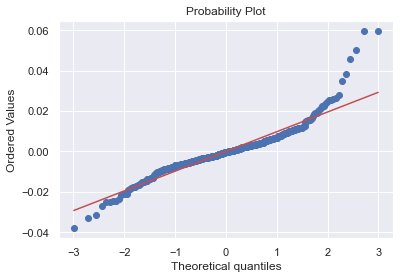

In [41]:
import pylab 
import scipy.stats as stats

stats.probplot(results.resid, dist="norm", plot=pylab)
pylab.show()